# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each.

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
houses = pd.read_csv("/content/boston_data.csv")
houses.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [ ]:
# overall
print("The actual shape of my data is",houses.shape[0],"rows and",houses.shape[1],"columns")
print("\n'Houses' contains the following data types:\n")
print(houses.dtypes)

In [34]:
# describing the data
houses.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.730912,10.509901,11.189901,0.069307,0.556710,6.30145,68.601733,3.799666,9.836634,411.688119,18.444554,355.068243,12.598936,22.312376
std,8.943922,22.053733,6.814909,0.254290,0.117321,0.67583,28.066143,2.109916,8.834741,171.073553,2.150295,94.489572,6.925173,8.837019
min,0.006320,0.000000,0.460000,0.000000,0.392000,3.56100,2.900000,1.169100,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082382,0.000000,5.190000,0.000000,0.453000,5.90275,45.800000,2.087875,4.000000,281.000000,17.375000,374.710000,7.135000,17.100000
50%,0.253715,0.000000,9.795000,0.000000,0.538000,6.23050,76.600000,3.207450,5.000000,330.000000,19.000000,391.065000,11.265000,21.400000
75%,4.053158,12.500000,18.100000,0.000000,0.631000,6.62925,94.150000,5.222125,24.000000,666.000000,20.200000,396.007500,16.910000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.78000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,50.000000


In [ ]:
# Checking :D
print(houses.isnull().sum(),"\n")
print("Well, butter my biscuit!")

In [8]:
# Clean the data for outliers --- let's see who is highly correlated. Let's check crim (crime I guess)
correlation_matrix = houses.corr()

In [ ]:
sns.scatterplot(x ="medv", y = "crim", data = houses)
plt.xlabel("medv")
plt.ylabel("crim")

sns.regplot(x ="medv", y = "crim", data = houses, scatter = False, color = "orange")
plt.show()
# Maybe i can say that the higher the crime rate, the lower the price of houses,
# So it's a negative correlation but it sure exists. Some ouliers present, we can check that!"

the first quartile is 0.0823825
the second quartile is 0.253715
the third quartile is 4.0531575
Inter quartile range is: 3.970775


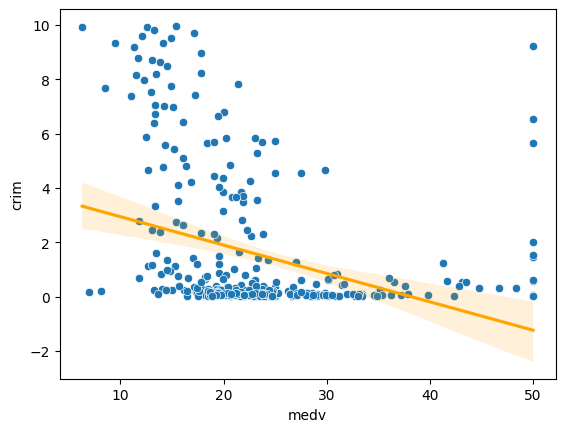

In [10]:
# for ouliers in crim:

Q1 = np.quantile(houses["crim"], 0.25)
print(f"the first quartile is {Q1}")

Q2 = np.quantile(houses["crim"], 0.50)
print(f"the second quartile is {Q2}")

Q3 = np.quantile(houses["crim"], 0.75)
print(f"the third quartile is {Q3}")

IQR = Q3 - Q1
print("Inter quartile range is:", IQR )

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

houses_cleaned = houses[(houses["crim"] >= lower_bound) & (houses["crim"] <= upper_bound)]

sns.scatterplot(x ="medv", y = "crim", data = houses_cleaned)
plt.xlabel("medv")
plt.ylabel("crim")

sns.regplot(x ="medv", y = "crim", data = houses_cleaned, scatter = False, color = "orange")
plt.show()

In [11]:
# Lost some data, but outliers are off and I think it was a good choice
print("The actual shape of my data is",houses_cleaned.shape[0],"rows and",houses.shape[1],"columns")

The actual shape of my data is 362 rows and 14 columns


### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [37]:
# Pick several varibables you think will be ost correlated with the prices of homes: # rm and lstat (lstat: Percentage of lower status of the population),
correlation_matrix = houses_cleaned.corr()
correlation_matrix

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.282928,0.593881,0.023782,0.640972,-0.122039,0.459131,-0.475349,0.896342,0.831952,0.341456,-0.429798,0.446840,-0.337100
zn,-0.282928,1.000000,-0.514203,-0.053334,-0.480623,0.301390,-0.531892,0.651302,-0.269258,-0.243309,-0.344063,0.151780,-0.406753,0.327928
indus,0.593881,-0.514203,1.000000,0.098551,0.737808,-0.332588,0.589524,-0.664366,0.543895,0.676960,0.288803,-0.343997,0.568671,-0.432661
chas,0.023782,-0.053334,0.098551,1.000000,0.140207,0.078806,0.120631,-0.143550,0.033898,0.003981,-0.100340,0.004691,0.002704,0.116882
nox,0.640972,-0.480623,0.737808,0.140207,1.000000,-0.236514,0.706229,-0.740254,0.554059,0.614222,0.084861,-0.387109,0.538675,-0.351961
rm,-0.122039,0.301390,-0.332588,0.078806,-0.236514,1.000000,-0.166433,0.124146,-0.079454,-0.175677,-0.306116,0.099406,-0.583999,0.734763
age,0.459131,-0.531892,0.589524,0.120631,0.706229,-0.166433,1.000000,-0.706650,0.376711,0.425778,0.160448,-0.231330,0.569988,-0.315558
dis,-0.475349,0.651302,-0.664366,-0.143550,-0.740254,0.124146,-0.706650,1.000000,-0.405744,-0.439598,-0.124357,0.253712,-0.432636,0.155347
rad,0.896342,-0.269258,0.543895,0.033898,0.554059,-0.079454,0.376711,-0.405744,1.000000,0.886990,0.417200,-0.395005,0.348433,-0.277302
tax,0.831952,-0.243309,0.676960,0.003981,0.614222,-0.175677,0.425778,-0.439598,0.886990,1.000000,0.392383,-0.400352,0.424275,-0.382300


Slope of our reg line is [0.05627961] 
 and the Y-intercept is 5.027059343593972


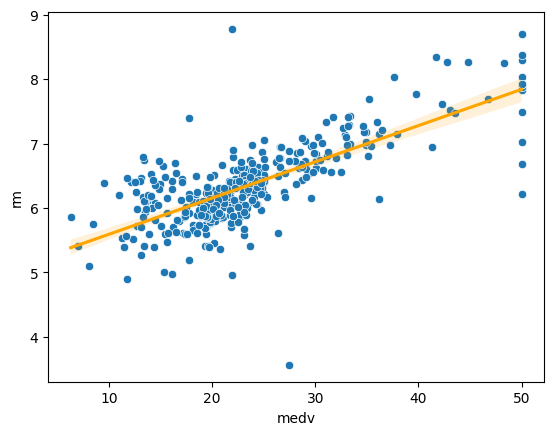

In [13]:
### for RM
from sklearn.linear_model import LinearRegression

x = houses_cleaned[["medv"]]
y = houses_cleaned["rm"]

model = LinearRegression()
model.fit(x,y)
slope = model.coef_
interception = model.intercept_
reg_line = interception + slope*x
print(f"Slope of our reg line is {slope} \n and the Y-intercept is {interception}")

sns.scatterplot(x ="medv", y = "rm", data = houses_cleaned)
plt.xlabel("medv")
plt.ylabel("rm")

sns.regplot(x ="medv", y = "rm", data = houses_cleaned, scatter = False, color = "orange")
plt.show()

In [ ]:
# Lets see "Istat" now
x = houses_cleaned[["medv"]]
y = houses_cleaned["lstat"]

model = LinearRegression()
model.fit(x,y)
slope = model.coef_
interception = model.intercept_
reg_line = interception + slope*x
print(f"Slope of our reg line is {slope} \n and the Y-intercept is {interception}")

sns.scatterplot(x ="medv", y = "lstat", data = houses_cleaned)
plt.xlabel("medv")
plt.ylabel("lstat")

sns.regplot(x ="medv", y = "lstat", data = houses_cleaned, scatter = False, color = "orange")
plt.show()

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

In [15]:
# Checking room average:
# For every additional room, we can see an increase in the median value of houses by the slope value (0.056).

# Checking lstat: Percentage of lower status of the population
# The higher the "lstat", the median value of houses ()"medv") is expected to decrease - slope value (-0.515).

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

In [16]:
houses_cleaned.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

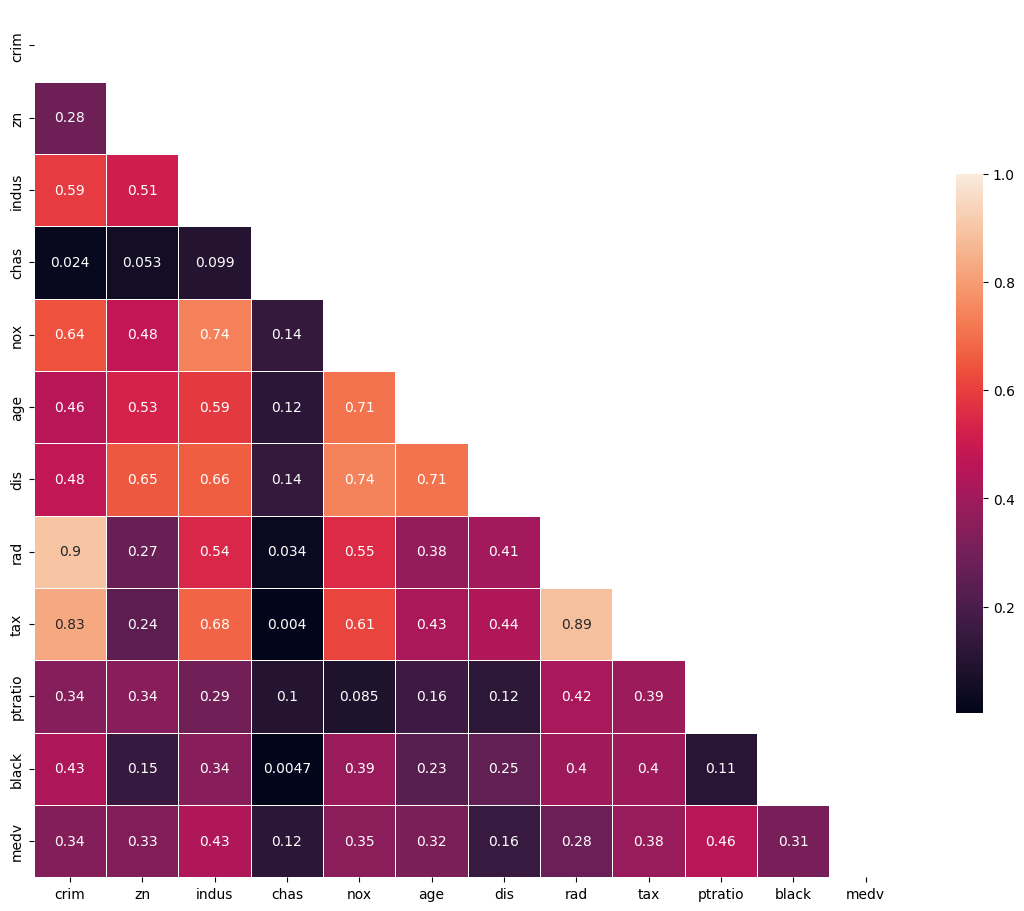

In [17]:
# heatmap from calss
remaining_variables = ['crim', 'zn', 'indus', 'chas', 'nox', 'age', 'dis', 'rad', 'tax','ptratio', 'black', 'medv']

corr=np.abs(houses_cleaned[remaining_variables].corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 14))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [18]:
# Are there any variables that you did not consider that have very high correlations? What are they?
# tax (property tax rate per $10,000), ptratio(p-teacher ratio by town --- this actually exists!!!!)and indus(proportion of non-retail business acres per town)

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation.

In [19]:
house_value = houses_cleaned["medv"].describe()
house_value

count    362.000000
mean      23.488950
std        8.426034
min        6.300000
25%       18.700000
50%       22.000000
75%       26.475000
max       50.000000
Name: medv, dtype: float64

In [20]:
# For exercice statistics
print("minimum value is", house_value["min"])
print("maximum value is", house_value["max"])
print("mean value is", house_value["mean"])
print("meadian value is the same as q2 which is", house_value["50%"])
print("standard deviation value is", house_value["std"])
print("All in hundred thousand dollars, I guess :D ")

minimum value is 6.3
maximum value is 50.0
mean value is 23.488950276243095
meadian value is the same as q2 which is 22.0
standard deviation value is 8.426034020257697
All in hundred thousand dollars, I guess :D 


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score.

In [38]:
from sklearn.metrics import r2_score, mean_squared_error # because we are talking of values let's add RMSE too, like "Show me the moneeeeey - by Tom Cruise"

In [39]:
def cool_function_model(y_true, y_predict):
    r2 = r2_score(y_true, y_predict)
    return r2

In [41]:
# Let's see if it works :D
from sklearn.model_selection import train_test_split

features = houses_cleaned.drop(columns=["medv"])
target = houses_cleaned["medv"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

ln_model = LinearRegression()
ln_model.fit(X_train, y_train)
print(ln_model.score(X_train, y_train))

pred = ln_model.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(pred, y_test)))

0.7595179960010632
RMSE: 4.6088119922881825


In [42]:
def cool_function_model(y_true, y_predict):
    r2 = r2_score(y_true, y_predict)
    return r2

print("Not that cool funtion:", cool_function_model(y_test, pred))
# Not happy. And the value is horrible, yes. I know!

Not that cool funtion: 0.6942818984326424


### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test.

In [24]:
# sad trombone. I thought it was meant to do this in the previous exercice. So, let's pretend that did not happen (ah ah )

features = houses_cleaned.drop(columns=["medv"])
target = houses_cleaned["medv"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

In [25]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(max_depth = 5,      ## parameters, model, max depths
                               n_estimators = 100, ## 100 trees
                               random_state = 1)
                               # bootstrap = True - default

forest.fit(X_train, y_train)
print("r^2: ",forest.score(X_test, y_test))

pred = forest.predict(X_test)
print("RMSE: ",np.sqrt(mean_squared_error(pred, y_test)))

r^2:  0.72585291935811
RMSE:  4.364356595683152


### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively.

In [43]:
# for 2
forest = RandomForestRegressor(max_depth = 2,
                               n_estimators = 100,
                               random_state = 1)
forest.fit(X_train, y_train)
print("for max depth of 2, r^2 is",forest.score(X_test, y_test))

# for 4
forest = RandomForestRegressor(max_depth = 4,
                               n_estimators = 100,
                               random_state = 1)
forest.fit(X_train, y_train)
print("for max depth of 4, r^2 is",forest.score(X_test, y_test))

# for 6
forest = RandomForestRegressor(max_depth = 6,
                               n_estimators = 100,
                               random_state = 1)
forest.fit(X_train, y_train)
print("for max depth of 6, r^2 is",forest.score(X_test, y_test))

# for 8
forest = RandomForestRegressor(max_depth = 8,
                               n_estimators = 100,
                               random_state = 1)
forest.fit(X_train, y_train)
print("for max depth of 8, r^2 is",forest.score(X_test, y_test))

# for 10
forest = RandomForestRegressor(max_depth = 10,
                               n_estimators = 100,
                               random_state = 1)
forest.fit(X_train, y_train)
print("for max depth of 10, r^2 is",forest.score(X_test, y_test))

for max depth of 2, r^2 is 0.5984375242252772
for max depth of 4, r^2 is 0.7013504472876858
for max depth of 6, r^2 is 0.7338459075351653
for max depth of 8, r^2 is 0.7299290196740089
for max depth of 10, r^2 is 0.7320597016401609


In [44]:
# Now, like in class of intro to ML, with knn neighbours
test_score = []
depth = []

for i in range(2,12,2):
  forest = RandomForestRegressor(max_depth = i, n_estimators = 100, random_state = 1)
  forest.fit(X_train, y_train)
  score_train = forest.score(X_train, y_train)
  score_test = forest.score(X_test, y_test)

  test_score.append(score_test)
  depth.append(i)

print("Max depth values:", depth)
print("Testing scores are:", test_score)

Max depth values: [2, 4, 6, 8, 10]
Testing scores are: [0.5984375242252772, 0.7013504472876858, 0.7338459075351653, 0.7299290196740089, 0.7320597016401609]


Now, plot the score for each tree on the training set and on the testing set.

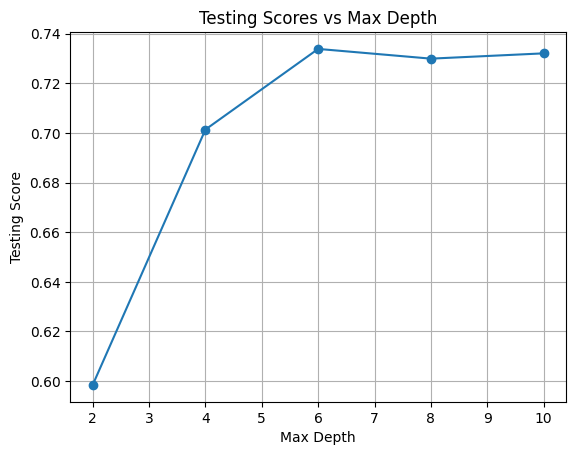

In [49]:
# directly from Gepeto
import matplotlib.pyplot as plt

max_depths = [2, 4, 6, 8, 10]
testing_scores = [0.5984375242252772, 0.7013504472876858, 0.7338459075351653, 0.7299290196740089, 0.7320597016401609]

plt.plot(max_depths, testing_scores, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Testing Score')
plt.title('Testing Scores vs Max Depth')
plt.grid(True)
plt.show()

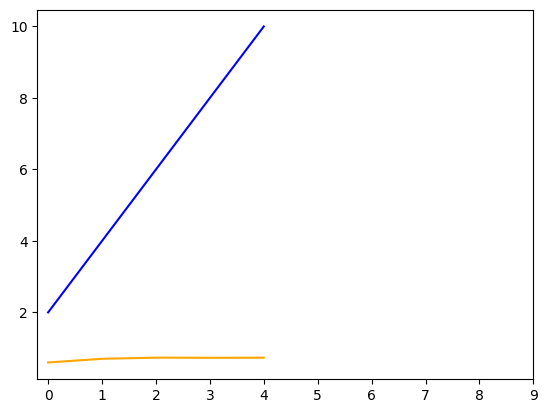

In [48]:
##still from day one ML ---- BUT CANNOT MAKE IT WORK

plt.plot(test_score, c = "orange")
plt.plot(depth, c = "blue")
plt.xticks(range(0,10))
plt.show()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [29]:
# Depth of 6 and 10 got the higher scores.

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? Check out this article before answering: https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-165e6942b229

In [30]:
# Your response here

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Create a parameter grid to search over
random_grid = {
    "max_depth": [None, 10, 20, 30, 40, 50],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, None, 4],
    "max_features": ['auto', 'sqrt', 'log2', None]}

forest = RandomForestRegressor(random_state=1)

random_search = RandomizedSearchCV(estimator=forest, param_distributions=random_grid, cv=5, n_iter=20)
random_search.fit(X_train, y_train)

In [32]:
#lets check the best params
random_search.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [33]:
# Your response here